# Stage 1 Consolidation as a function of time

This code is produced on python, by group 14. Hdr=9.4m

**Import packages**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Set variables to their calculated values, all determined in Section 3**

In [3]:
de=1.356
F=2.728
Hdr=9.4
Ch=0.0272 #m^2/week
Cv=0.0108864 #m^2/week
s=0

**Defining a function to calculate Uv (vertical consolidation)**

In [4]:
def U_vertical(Tv, s):
    
    for m in range(0,10**4):
        q=(2/((np.pi/2)*(2*m+1))**2*np.exp(-((np.pi/2)*(2*m+1))**2*Tv))
        s+=q
           
    Uv=1-s
    s=0
    q=0
    return Uv

**Sizing the lists**

In [5]:
t_values=[]
U_values=[]

**Looping through all the time values (in weeks) and determing the consolidation associated**

This code calculates U, from U=1-(1-Uv)(1-Uh). Uh is determined on time, and the design of the pre-fabricated vertical drains. Uv is also a function of time.

In [6]:
for t in range(1,52):
    Tv=Cv*t/Hdr**2
    Uv=U_vertical(Tv, s)
    
    Th=Ch*t/de**2
    Uh=1-np.exp(-8*Th/F)
    
    U=1-(1-Uv)*(1-Uh)
    
    t_values.append(t)
    U_values.append(U)

Results=pd.DataFrame({'t value': t_values, 'U value': U_values})

In [7]:
print(Results)

    t value   U value
0         1  0.054446
1         2  0.099345
2         3  0.141075
3         4  0.180361
4         5  0.217537
5         6  0.252815
6         7  0.286350
7         8  0.318264
8         9  0.348660
9        10  0.377628
10       11  0.405250
11       12  0.431596
12       13  0.456735
13       14  0.480727
14       15  0.503629
15       16  0.525497
16       17  0.546378
17       18  0.566322
18       19  0.585371
19       20  0.603569
20       21  0.620955
21       22  0.637567
22       23  0.653440
23       24  0.668609
24       25  0.683105
25       26  0.696960
26       27  0.710202
27       28  0.722859
28       29  0.734958
29       30  0.746524
30       31  0.757580
31       32  0.768150
32       33  0.778255
33       34  0.787916
34       35  0.797154
35       36  0.805985
36       37  0.814430
37       38  0.822505
38       39  0.830226
39       40  0.837609
40       41  0.844669
41       42  0.851421
42       43  0.857877
43       44  0.864052
44       4

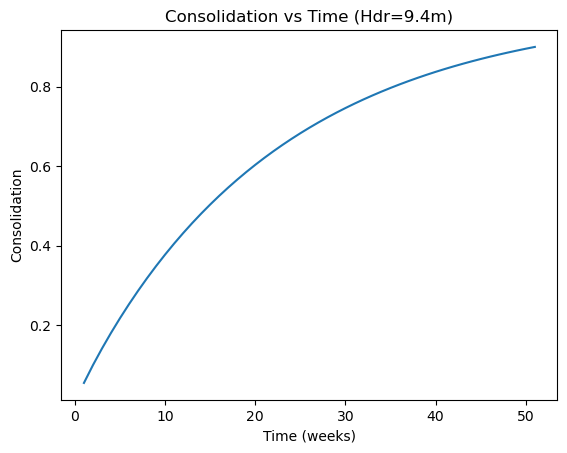

In [8]:
plt.plot(t_values, U_values)

plt.xlabel('Time (weeks)')
plt.ylabel('Consolidation')
plt.title('Consolidation vs Time (Hdr=9.4m)')

plt.show()